In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
batch_size = 3
img_height = 128
img_width = 128

In [3]:
data_dir = "ksztalt_kolor"
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=111,
  image_size=(img_height, img_width),
  batch_size=batch_size)
class_names = train_ds.class_names
print(class_names)

Found 31630 files belonging to 35 classes.
Using 25304 files for training.
['bruk_prosty_bianco', 'bruk_prosty_bronzo', 'bruk_prosty_carbon', 'bruk_prosty_diamond', 'bruk_prosty_gothic', 'bruk_prosty_granito', 'bruk_prosty_nero', 'bruk_prosty_steel', 'bruk_prosty_szary', 'bruk_prosty_white', 'bruk_prosty_york', 'fantazja_nero', 'master_grafit', 'metro_dark', 'metro_diamond', 'metro_gothic', 'metro_grafit', 'metro_white', 'metro_xl_carbon', 'podwojne_t_szary', 'trend_barwy_jesieni', 'trend_dark', 'trend_diamond', 'trend_gothic', 'trend_grafit', 'trend_light', 'trend_szary', 'wena_barwy_jesieni', 'wena_bianco', 'wena_dark', 'wena_diamond', 'wena_gothic', 'wena_grafitowy', 'wena_szary', 'wena_york']


2022-06-07 14:10:23.569306: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-07 14:10:23.638870: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-07 14:10:23.639477: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-07 14:10:23.646498: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-07 14:10:23.647155: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from S

2022-06-07 14:10:34.293611: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at strided_slice_op.cc:102 : INVALID_ARGUMENT: slice index 3 of dimension 0 out of bounds.


InvalidArgumentError: slice index 3 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

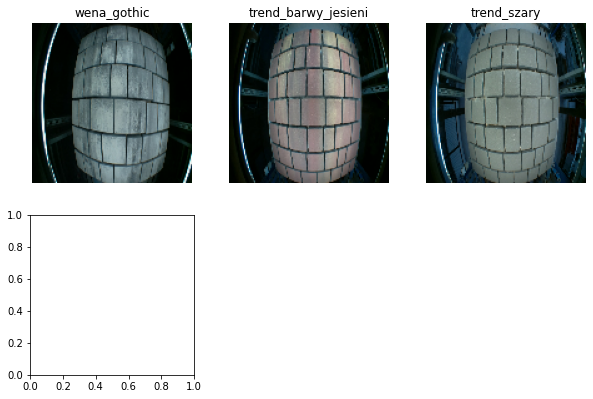

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [5]:
print(train_ds)

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=111,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 31630 files belonging to 35 classes.
Using 6326 files for validation.


In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
num_classes = len(class_names)
print(num_classes)

35


In [9]:
model = Sequential([
  layers.Rescaling(1./255),
  layers.Conv2D(32, 2, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 4, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 4, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
epochs = 2
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/2


2022-06-07 14:11:18.697701: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-06-07 14:11:20.279861: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-06-07 14:11:20.280592: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-06-07 14:11:20.280624: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-06-07 14:11:20.281280: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-06-07 14:11:20.281364: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


8435/8435 [==============================] - 199s 23ms/step - loss: 0.3579 - accuracy: 0.9005 - val_loss: 0.0923 - val_accuracy: 0.9801
Epoch 2/2
8435/8435 [==============================] - 190s 23ms/step - loss: 0.1030 - accuracy: 0.9736 - val_loss: 0.0975 - val_accuracy: 0.9764


In [15]:
test_dir = "test_ksztalty"
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

results = model.evaluate(test_ds, batch_size=3)

Found 180 files belonging to 7 classes.
60/60 [==============================] - 1s 9ms/step - loss: 0.0466 - accuracy: 0.9889


In [18]:
def decode_img(img):
        img = tf.io.read_file(img)
        img = tf.io.decode_jpeg(img, channels=3)
        return tf.image.resize(img, [128, 128])

for item in os.listdir("testyy"):
    if item.endswith(".jpg"):
        image = decode_img(f"testyy/{item}")
        predictions = model.predict_on_batch(np.expand_dims(image, axis=0))
        score = tf.nn.softmax(predictions[0])
        detected_shape = class_names[np.argmax(score)]
        score = 100 * np.max(score)
        print("Przewidziany kształt:", detected_shape, f"Prawdopodobieństwo: {score}")
        print(detected_shape)
    

    

Przewidziany kształt: bruk_prosty_gothic Prawdopodobieństwo: 99.53871369361877
bruk_prosty_gothic
Przewidziany kształt: bruk_prosty_gothic Prawdopodobieństwo: 99.59432482719421
bruk_prosty_gothic
Przewidziany kształt: bruk_prosty_gothic Prawdopodobieństwo: 99.97608065605164
bruk_prosty_gothic
Przewidziany kształt: bruk_prosty_gothic Prawdopodobieństwo: 99.93070363998413
bruk_prosty_gothic
Przewidziany kształt: bruk_prosty_gothic Prawdopodobieństwo: 99.92244243621826
bruk_prosty_gothic
Przewidziany kształt: bruk_prosty_gothic Prawdopodobieństwo: 99.65779185295105
bruk_prosty_gothic
Przewidziany kształt: bruk_prosty_gothic Prawdopodobieństwo: 99.94763731956482
bruk_prosty_gothic
Przewidziany kształt: bruk_prosty_gothic Prawdopodobieństwo: 99.1272509098053
bruk_prosty_gothic
Przewidziany kształt: bruk_prosty_gothic Prawdopodobieństwo: 99.9561607837677
bruk_prosty_gothic
Przewidziany kształt: bruk_prosty_gothic Prawdopodobieństwo: 99.8506486415863
bruk_prosty_gothic
Przewidziany kształt: b

In [13]:
model.save("ksztalt_kolor_model")

INFO:tensorflow:Assets written to: ksztalt_kolor_model/assets


INFO:tensorflow:Assets written to: ksztalt_kolor_model/assets
